<a href="https://colab.research.google.com/github/abmt99/Nasa-Asteroid-Model-Prediction/blob/master/Nasa_Asteroid_FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NASA ASTEROID CLASSIFICATION
## A)Data Preparation and Analysis 
Curation of database

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
uploaded = files.upload()
#URL for database:
myurl='https://github.com/abmt99/Nasa_Asteroid/blob/master/Nasa_asteroid.csv'
Data=pd.read_csv('Nasa_asteroid.csv')

Saving Nasa_asteroid.csv to Nasa_asteroid (6).csv


Removing Null value records

In [ ]:
#print(Data.shape)
Data.isnull().values.any()
# If there are blank cells
Data = Data.dropna()
print('After removing records containing null values: ')
#print(Data.shape)
Data.Hazardous = Data.Hazardous.astype(int)
#this means there are no null val
Data.head

After removing records containing null values: 


<bound method NDFrame.head of       Neo Reference ID     Name  ...  Equinox  Hazardous
0              3703080  3703080  ...    J2000          1
1              3723955  3723955  ...    J2000          0
2              2446862  2446862  ...    J2000          1
3              3092506  3092506  ...    J2000          0
4              3514799  3514799  ...    J2000          1
...                ...      ...  ...      ...        ...
4682           3759007  3759007  ...    J2000          0
4683           3759295  3759295  ...    J2000          0
4684           3759714  3759714  ...    J2000          0
4685           3759720  3759720  ...    J2000          0
4686           3772978  3772978  ...    J2000          0

[4687 rows x 40 columns]>

In [ ]:
Newdata=np.array(Data[['Absolute Magnitude','Est Dia in KM(max)','Relative Velocity km per sec','Miss Dist.(kilometers)','Miles per hour','Orbit ID','Orbit Uncertainity','Minimum Orbit Intersection','Jupiter Tisserand Invariant','Eccentricity','Semi Major Axis','Inclination','Asc Node Longitude','Perihelion Distance','Perihelion Arg','Perihelion Time','Mean Anomaly','Hazardous']])
#print(Newdata)
np.set_printoptions(precision = 2)
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})




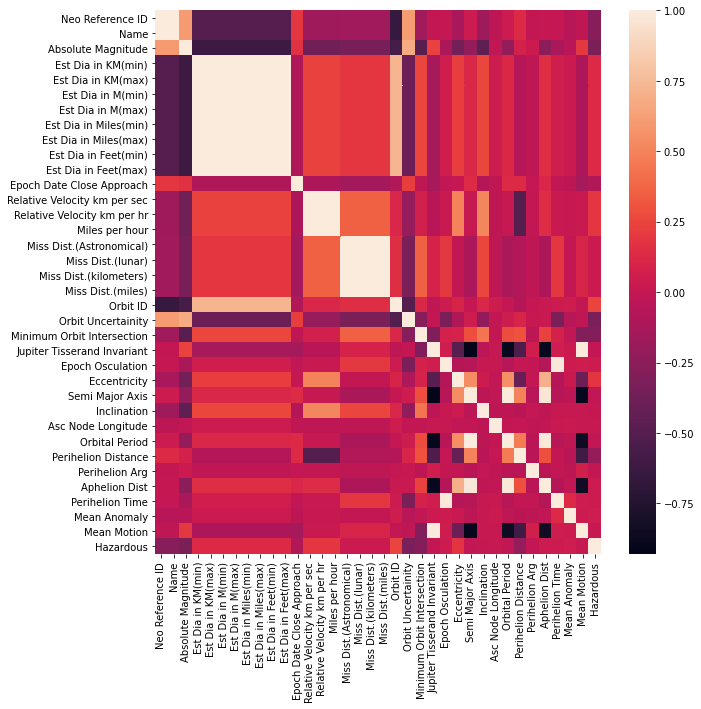

In [ ]:
correlation = Data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

INPUT FEATURES VISUALIZATION

In [ ]:
uploaded = files.upload() 
newurl='https://github.com/abmt99/Nasa_Asteroid/blob/master/Reduced_Nasa_asteroid.csv'
red=pd.read_csv('Reduced_Nasa_asteroidFinal.csv')

Saving Reduced_Nasa_asteroidFinal.csv to Reduced_Nasa_asteroidFinal (2).csv


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6808ea518>,
      dtype=object)

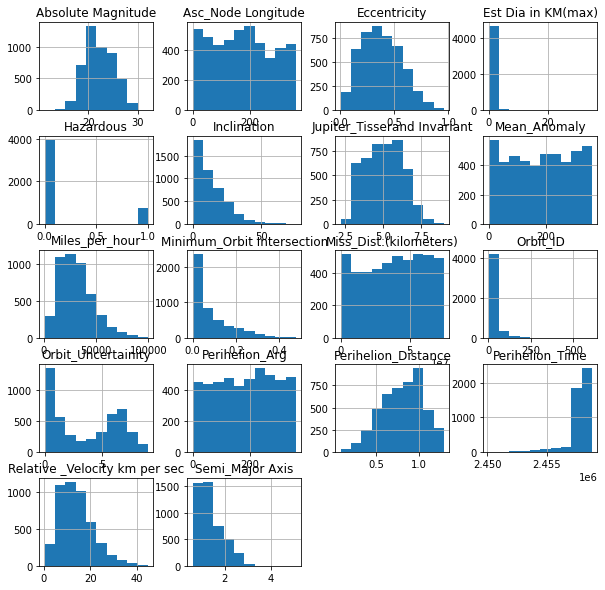

In [ ]:
plt.rcParams["figure.figsize"] = ((10,10))
red.hist()

Calculate mean,std,min,max

In [ ]:
red.describe().T

,count,mean,std,min,25%,50%,75%,max
Absolute Magnitude,4687.0,2.226786e+01,2.890972e+00,1.116000e+01,2.010000e+01,2.190000e+01,2.450000e+01,3.210000e+01
Est Dia in KM(max),4687.0,4.575089e-01,8.263912e-01,2.259644e-03,7.482384e-02,2.477650e-01,5.675969e-01,3.483694e+01
Relative _Velocity km per sec,4687.0,1.397081e+01,7.293223e+00,3.355041e-01,8.432865e+00,1.291789e+01,1.807765e+01,4.463375e+01
Miss_Dist.(kilometers),4687.0,3.841347e+07,2.181110e+07,2.660989e+04,1.995928e+07,3.964771e+07,5.746863e+07,7.478160e+07
Miles_per_hour,4687.0,3.125131e+04,1.631421e+04,7.504891e+02,1.886348e+04,2.889603e+04,4.043789e+04,9.984123e+04
Orbit_ID,4687.0,2.830062e+01,3.829967e+01,1.000000e+00,9.000000e+00,1.600000e+01,3.100000e+01,6.110000e+02
Orbit_Uncertainity,4687.0,3.516962e+00,3.078307e+00,0.000000e+00,0.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00
Minimum_Orbit Intersection,4687.0,8.232007e-02,9.029997e-02,2.060000e-06,1.458510e-02,4.736550e-02,1.235935e-01,4.778910e-01
Jupiter_Tisserand Invariant,4687.0,5.056111e+00,1.237818e+00,2.196000e+00,4.049500e+00,5.071000e+00,6.019000e+00,9.025000e+00
Eccentricity,4687.0,3.825691e-01,1.804438e-01,7.522355e-03,2.408583e-01,3.724502e-01,5.124106e-01,9.602607e-01


Output Visualization- Hazardous Or Non-Hazardous

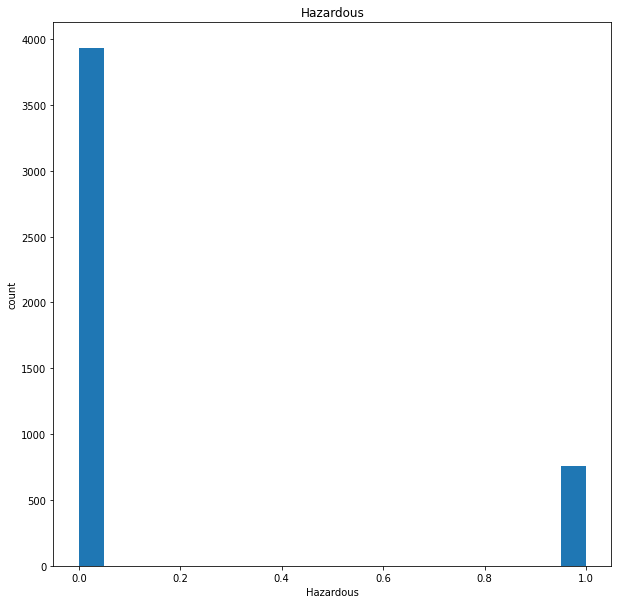

In [ ]:
plt.hist(red.iloc[:, -1], 20, stacked=True, density=False)
plt.title('Hazardous')
plt.ylabel('count')
plt.xlabel('Hazardous')
plt.show()

##Split the database into Train data and Validation data

In [ ]:
np.random.shuffle(Newdata)
X = Newdata[:, :-1]
Y = Newdata[:, -1]

index_30percent = int(0.3 * len(Newdata[:, 0]))
print(index_30percent)
# Split into training and validation
XVALID = Newdata[:index_30percent, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
YVALID = Newdata[:index_30percent, 17]
XTRAIN = Newdata[index_30percent:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
YTRAIN = Newdata[index_30percent:, 17]


1406


Normalize data: 

Training data parameters are used for normalization.

In [ ]:
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XVALID -= mean
XVALID /= std

## B) Model Selection and Evaluation
Logistic Regression Model(Basic- 1 Layer)

In [ ]:

#One layer

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'Reduced_Nasa_asteroid.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=200, verbose=1)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=1056, batch_size=4, callbacks = [callback_a, callback_b])

Epoch 1/1056
811/821 [============================>.] - ETA: 0s - loss: 0.7349 - accuracy: 0.6107
Epoch 00001: val_loss improved from inf to 0.51716, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.7320 - accuracy: 0.6126 - val_loss: 0.5172 - val_accuracy: 0.7681
Epoch 2/1056
799/821 [============================>.] - ETA: 0s - loss: 0.4489 - accuracy: 0.8176
Epoch 00002: val_loss improved from 0.51716 to 0.37230, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 1ms/step - loss: 0.4531 - accuracy: 0.8190 - val_loss: 0.3723 - val_accuracy: 0.8570
Epoch 3/1056
802/821 [============================>.] - ETA: 0s - loss: 0.3564 - accuracy: 0.8625
Epoch 00003: val_loss improved from 0.37230 to 0.31134, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8622 - val_loss: 0.3113 - val_accuracy: 0.8727
Epoch 4/1056
801/821

Single Layer evaluation of Validation dataset

In [ ]:
model.load_weights('Reduced_Nasa_asteroid.hdf5')
prediction = model.predict(XVALID)
accuracy = accuracy_score(YVALID, prediction.round())
precision = precision_score(YVALID, prediction.round())
recall = recall_score(YVALID, prediction.round())
f1score = f1_score(YVALID, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Accuracy: 96.51%
Precision: 89.13%
Recall: 89.52%
F1-score: 89.32


Learning Curve:

{'verbose': 1, 'epochs': 1056, 'steps': 821}


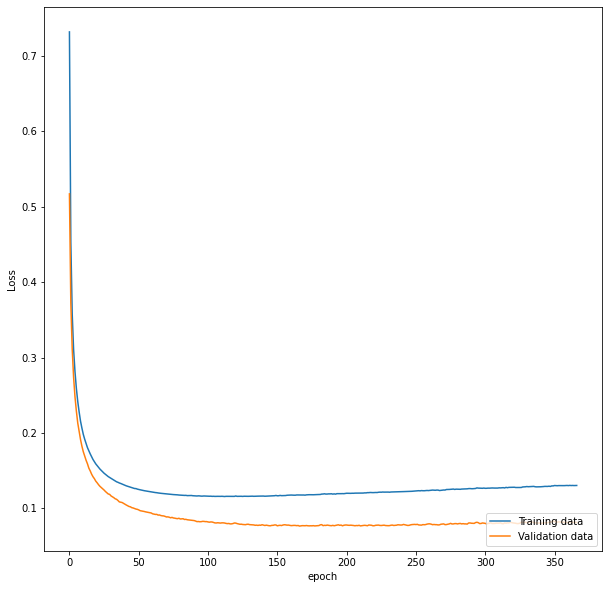

In [ ]:
print(history.params)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

Evaluation on Training data set.(Form Single Layer)

In [ ]:
prediction=model.predict(XTRAIN)
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Training Set Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Training Set Accuracy: 95.15%
Precision: 84.82%
Recall: 84.98%
F1-score: 84.90


## Neural Network Model with Sigmoid Activation(Multilayer) 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'Reduced_Nasa_asteroid.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=200, verbose=1)
model = Sequential()
model.add(Dense(24, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=1056, batch_size=4, callbacks = [callback_a, callback_b])


Epoch 1/1056
811/821 [============================>.] - ETA: 0s - loss: 0.3327 - accuracy: 0.8416
Epoch 00001: val_loss improved from inf to 0.26326, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8415 - val_loss: 0.2633 - val_accuracy: 0.8442
Epoch 2/1056
801/821 [============================>.] - ETA: 0s - loss: 0.2158 - accuracy: 0.8933
Epoch 00002: val_loss improved from 0.26326 to 0.19158, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.2153 - accuracy: 0.8948 - val_loss: 0.1916 - val_accuracy: 0.9310
Epoch 3/1056
814/821 [============================>.] - ETA: 0s - loss: 0.1477 - accuracy: 0.9459
Epoch 00003: val_loss improved from 0.19158 to 0.14208, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.1470 - accuracy: 0.9464 - val_loss: 0.1421 - val_accuracy: 0.9438
Epoch 4/1056
782/821

Evaluation on Validation set

In [ ]:
model.load_weights('Reduced_Nasa_asteroid.hdf5')
prediction = model.predict(XVALID)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, prediction.round())
precision = precision_score(YVALID, prediction.round())
recall = recall_score(YVALID, prediction.round())
f1score = f1_score(YVALID, prediction.round())
print("Multilayer NN Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Multilayer NN Accuracy: 98.44%
Precision: 96.51%
Recall: 94.04%
F1-score: 95.26


{'verbose': 1, 'epochs': 1056, 'steps': 821}


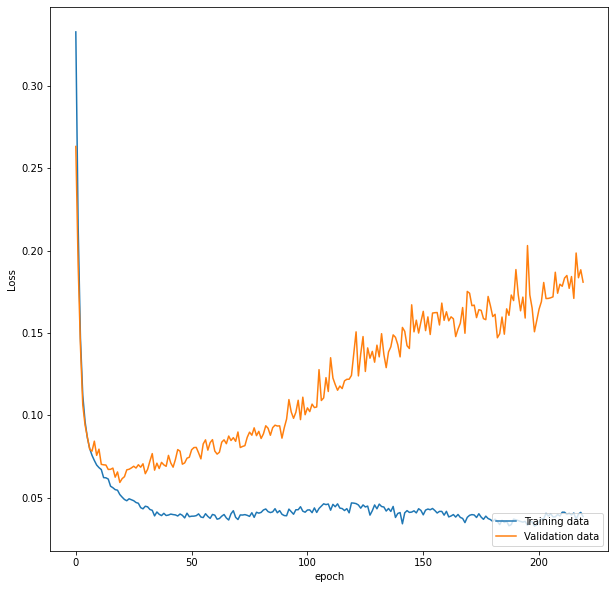

In [ ]:
print(history.params)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

evaluation on Training model 

In [ ]:
prediction=model.predict(XTRAIN)
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Training Set Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Training Set Accuracy: 98.63%
Precision: 97.41%
Recall: 93.85%
F1-score: 0.96


##3 Layers - with increased number of neurons and linear activation function in last layer


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID),epochs = 1056, verbose = 1 )

Epoch 1/1056
103/103 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8372 - val_loss: 0.2940 - val_accuracy: 0.8599
Epoch 2/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8714 - val_loss: 0.2409 - val_accuracy: 0.8947
Epoch 3/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9037 - val_loss: 0.1994 - val_accuracy: 0.9168
Epoch 4/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9220 - val_loss: 0.1761 - val_accuracy: 0.9275
Epoch 5/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9418 - val_loss: 0.1800 - val_accuracy: 0.9239
Epoch 6/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.9485 - val_loss: 0.1311 - val_accuracy: 0.9431
Epoch 7/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9540 - val_loss: 0.1184 - val_accuracy:

In [ ]:
prediction = model.predict(XVALID)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, prediction.round())
precision = precision_score(YVALID, prediction.round())
recall = recall_score(YVALID, prediction.round())
f1score = f1_score(YVALID, prediction.round())
print("Multilayer NN Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Multilayer NN Accuracy: 98.65%
Precision: 96.63%
Recall: 94.37%
F1-score: 95.49


In [ ]:
prediction=model.predict(XTRAIN)
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Training Set Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Training Set Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 1.00


{'verbose': 1, 'epochs': 1056, 'steps': 103}


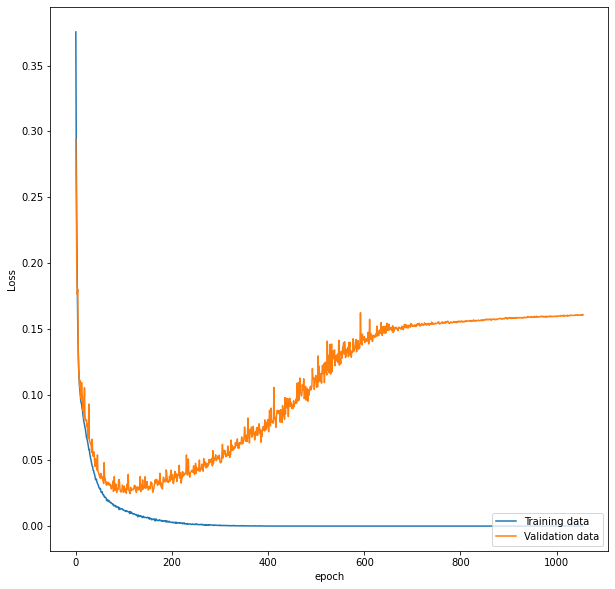

In [ ]:
print(history.params)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

#A neural Network with 5 layers but with low number of neurons:

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID),epochs = 1056, verbose = 1 )

Epoch 1/1056
103/103 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6471 - val_loss: 0.5480 - val_accuracy: 0.8371
Epoch 2/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8397 - val_loss: 0.4756 - val_accuracy: 0.8371
Epoch 3/1056
103/103 [==============================] - 0s 4ms/step - loss: 0.4547 - accuracy: 0.8397 - val_loss: 0.4377 - val_accuracy: 0.8371
Epoch 4/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8397 - val_loss: 0.3956 - val_accuracy: 0.8371
Epoch 5/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8397 - val_loss: 0.3450 - val_accuracy: 0.8371
Epoch 6/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8397 - val_loss: 0.2989 - val_accuracy: 0.8371
Epoch 7/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8397 - val_loss: 0.2563 - val_accuracy:

In [ ]:
prediction = model.predict(XVALID)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, prediction.round())
precision = precision_score(YVALID, prediction.round())
recall = recall_score(YVALID, prediction.round())
f1score = f1_score(YVALID, prediction.round())
print("Multilayer NN Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Multilayer NN Accuracy: 99.15%
Precision: 97.38%
Recall: 97.38%
F1-score: 97.38


In [ ]:
prediction=model.predict(XTRAIN)
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Training Set Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Training Set Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 1.00


#A neural Network with 5 layers and increased number of neurons:

In [ ]:
model = Sequential()
model.add(Dense(132, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(64, activation='relu'))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID),epochs = 1056, verbose = 1 )

Epoch 1/1056
103/103 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.8171 - val_loss: 0.4081 - val_accuracy: 0.8371
Epoch 2/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8473 - val_loss: 0.2810 - val_accuracy: 0.8976
Epoch 3/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8894 - val_loss: 0.2074 - val_accuracy: 0.9125
Epoch 4/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9269 - val_loss: 0.1469 - val_accuracy: 0.9459
Epoch 5/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9357 - val_loss: 0.1365 - val_accuracy: 0.9452
Epoch 6/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9433 - val_loss: 0.1089 - val_accuracy: 0.9602
Epoch 7/1056
103/103 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9418 - val_loss: 0.0950 - val_accuracy:

In [ ]:
prediction = model.predict(XVALID)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, prediction.round())
precision = precision_score(YVALID, prediction.round())
recall = recall_score(YVALID, prediction.round())
f1score = f1_score(YVALID, prediction.round())
print("Multilayer NN Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Multilayer NN Accuracy: 99.08%
Precision: 97.37%
Recall: 96.94%
F1-score: 97.16


In [ ]:
prediction=model.predict(XTRAIN)
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Training Set Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Training Set Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 1.00


##Overfitting

---




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback_a = ModelCheckpoint(filepath = 'Reduced_Nasa_asteroid.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=500, verbose=1)
model = Sequential()
model.add(Dense(24, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=3056, batch_size=4, callbacks = [callback_a, callback_b])


Epoch 1/3056
796/821 [============================>.] - ETA: 0s - loss: 0.3220 - accuracy: 0.8562
Epoch 00001: val_loss improved from inf to 0.21908, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 2s 2ms/step - loss: 0.3195 - accuracy: 0.8574 - val_loss: 0.2191 - val_accuracy: 0.9175
Epoch 2/3056
803/821 [============================>.] - ETA: 0s - loss: 0.1818 - accuracy: 0.9256
Epoch 00002: val_loss improved from 0.21908 to 0.15486, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.9247 - val_loss: 0.1549 - val_accuracy: 0.9403
Epoch 3/3056
810/821 [============================>.] - ETA: 0s - loss: 0.1330 - accuracy: 0.9438
Epoch 00003: val_loss improved from 0.15486 to 0.12970, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.1320 - accuracy: 0.9445 - val_loss: 0.1297 - val_accuracy: 0.9488
Epoch 4/3056
804/821

In [ ]:
model.load_weights('Reduced_Nasa_asteroid.hdf5')
prediction = model.predict(XVALID)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, prediction.round())
precision = precision_score(YVALID, prediction.round())
recall = recall_score(YVALID, prediction.round())
f1score = f1_score(YVALID, prediction.round())
print("Multilayer NN Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Multilayer NN Accuracy: 98.65%
Precision: 96.86%
Recall: 94.74%
F1-score: 95.79


In [ ]:
model.load_weights('Reduced_Nasa_asteroid.hdf5')
prediction=model.predict(XTRAIN)
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Training Set Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score*100))

Training Set Accuracy: 99.51%
Precision: 98.85%
Recall: 98.10%
F1-score: 98.48


# C) Feature Importance

##Accuracies noted by fitting models using one input feature at a time.  

In [ ]:
import numpy as np
Newdata = np.genfromtxt('Reduced_Nasa_asteroid.csv', delimiter=",", skip_header = True) 
np.set_printoptions(precision = 2) 
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

I used one input feature at a time and noted accuracy

In [ ]:
np.random.shuffle(Newdata)
X = Newdata[:, 11]
Y = Newdata[:, -1]
index_30percent = int(0.3 * len(Newdata[:, 0]))
XVALID = Newdata[:index_30percent, [0]]
YVALID = Newdata[:index_30percent, 17]
XTRAIN = Newdata[index_30percent:, [0]]
YTRAIN = Newdata[index_30percent:, 17]
mean = XTRAIN.mean(axis=0)
std = XTRAIN.std(axis=0)



(4687,)
1406


In [ ]:
callback_a = ModelCheckpoint(filepath = 'Reduced_Nasa_asteroid.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=4, callbacks = [callback_a, callback_b])
model.load_weights('Reduced_Nasa_asteroid.hdf5')
from sklearn.metrics import accuracy_score

prediction = model.predict(XVALID)
accuracy = accuracy_score(YVALID, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/256
819/821 [============================>.] - ETA: 0s - loss: 0.5654 - accuracy: 0.8376
Epoch 00001: val_loss improved from inf to 0.47013, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.5648 - accuracy: 0.8379 - val_loss: 0.4701 - val_accuracy: 0.8414
Epoch 2/256
781/821 [===========================>..] - ETA: 0s - loss: 0.4517 - accuracy: 0.8380
Epoch 00002: val_loss improved from 0.47013 to 0.43891, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 1ms/step - loss: 0.4514 - accuracy: 0.8379 - val_loss: 0.4389 - val_accuracy: 0.8414
Epoch 3/256
815/821 [============================>.] - ETA: 0s - loss: 0.4437 - accuracy: 0.8377
Epoch 00003: val_loss improved from 0.43891 to 0.43816, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 1ms/step - loss: 0.4433 - accuracy: 0.8379 - val_loss: 0.4382 - val_accuracy: 0.8414
Epoch 4/256
811/821 [==

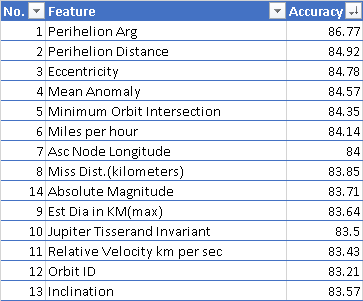

#Graph showing the importance of features and accuracy

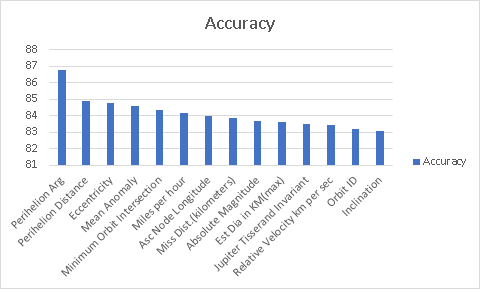

# Removing least important features one by one
Removed one by one feature till last 2 features remains and noted accuracy. 

In [ ]:

np.random.shuffle(Newdata)
X = Newdata[:, [9,14]]
Y = Newdata[:, -1]

index_30percent = int(0.3 * len(Newdata[:, 0]))
print(index_30percent)
# Split into training and validation
XVALID = Newdata[:index_30percent, [9,14]]
YVALID = Newdata[:index_30percent, 17]
XTRAIN = Newdata[index_30percent:, [9,14]]
YTRAIN = Newdata[index_30percent:, 17]
#XVALID.shape

mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std
XVALID -= mean
XVALID /= std


1406


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'Reduced_Nasa_asteroid.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=4, callbacks = [callback_a])
model.load_weights('Reduced_Nasa_asteroid.hdf5')
from sklearn.metrics import accuracy_score

prediction = model.predict(XVALID)
accuracy = accuracy_score(YVALID, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/256
814/821 [============================>.] - ETA: 0s - loss: 0.5009 - accuracy: 0.8237
Epoch 00001: val_loss improved from inf to 0.44740, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.4983 - accuracy: 0.8251 - val_loss: 0.4474 - val_accuracy: 0.8329
Epoch 2/256
785/821 [===========================>..] - ETA: 0s - loss: 0.4314 - accuracy: 0.8408
Epoch 00002: val_loss improved from 0.44740 to 0.44630, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 1ms/step - loss: 0.4297 - accuracy: 0.8415 - val_loss: 0.4463 - val_accuracy: 0.8329
Epoch 3/256
809/821 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8415
Epoch 00003: val_loss improved from 0.44630 to 0.44419, saving model to Reduced_Nasa_asteroid.hdf5
821/821 [==============================] - 1s 2ms/step - loss: 0.4275 - accuracy: 0.8415 - val_loss: 0.4442 - val_accuracy: 0.8329
Epoch 4/256
774/821 [==

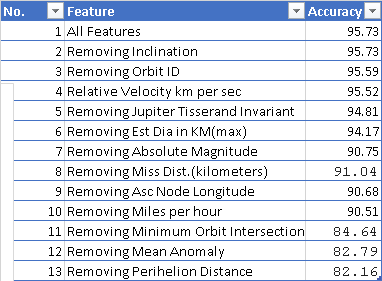

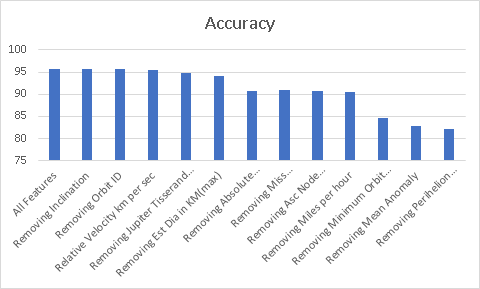

#Comparison of Performances after reduction of low significant features

We will remove 4 features that are least significant(or non informative):
1. Inclination
2.Orbit Id
3. Relative velocity  Km per sec
4.  Jupiter Tisserand Invariant

In [ ]:

np.random.shuffle(Newdata)
X = Newdata[:, [0,1,3,4,6,7,9,10,11,12,13,14,15,16]]
Y = Newdata[:, -1]
from sklearn.model_selection import train_test_split
XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(X, Y, test_size = 0.3, random_state = 123)
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'Reduced_Nasa_asteroid.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=4, callbacks = [callback_a])
model.load_weights('Reduced_Nasa_asteroid.hdf5')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(XVALID)
accuracy = accuracy_score(YVALID, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(YVALID, prediction.round())
precision = precision_score(YVALID, prediction.round())
recall = recall_score(YVALID, prediction.round())
f1score = f1_score(YVALID, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/256
809/820 [============================>.] - ETA: 0s - loss: 0.4627 - accuracy: 0.8368
Epoch 00001: val_loss improved from inf to 0.39064, saving model to Reduced_Nasa_asteroid.hdf5
820/820 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.8363 - val_loss: 0.3906 - val_accuracy: 0.8415
Epoch 2/256
773/820 [===========================>..] - ETA: 0s - loss: 0.3757 - accuracy: 0.8373
Epoch 00002: val_loss improved from 0.39064 to 0.34223, saving model to Reduced_Nasa_asteroid.hdf5
820/820 [==============================] - 1s 1ms/step - loss: 0.3730 - accuracy: 0.8378 - val_loss: 0.3422 - val_accuracy: 0.8415
Epoch 3/256
778/820 [===========================>..] - ETA: 0s - loss: 0.3308 - accuracy: 0.8345
Epoch 00003: val_loss improved from 0.34223 to 0.29835, saving model to Reduced_Nasa_asteroid.hdf5
820/820 [==============================] - 1s 1ms/step - loss: 0.3251 - accuracy: 0.8378 - val_loss: 0.2984 - val_accuracy: 0.8415
Epoch 4/256
783/820 [==

Accuracy with all the features =95.73

Accuracy after removing 4 least significant features= 95.66 

#D) Peer Review:
After Peer Review session, I added implementation of Early stopping for training the dataset.